In [3]:
# Machine Learning Assginmnent 2
# GOAL: Segmentation of cells for the Kaggle Competition


# PLAN:
# Do a first preprocessing:
# -Grey scale
# -Gaussian Blur
# -Otsu thrshold
#
# maybe try clustering methods.

# To get separate masks, can use ndimage from scipy



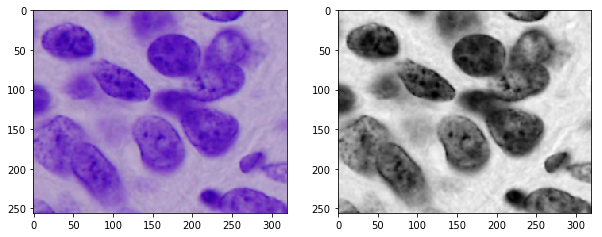

In [4]:
%matplotlib inline
#Task1: Show your deep understanding of the specific problem, data and its characteristics via e.g. plots
#and preliminary analysis

import pathlib
import imageio
import numpy as np

#We import the data as showed in the "Teaching notebook"
# All that follows taken from there
training_paths = pathlib.Path('C:\Users\pc\Python_Projects\MachineLearningWARWICK\Ass2data\SampleTraining\sample_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[43]
im = imageio.imread(str(im_path))

#make into a greyscale version
from skimage.color import rgb2gray
im_gray = rgb2gray(im)

#plot to see
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_gray,cmap='gray')

plt.show()
#########

# Maybe a good thing to do would be to try to cluster
# since there is clearly a lot of different kind of pictures

import pandas as pd
import os
import skimage.io
df_labels = pd.read_csv('C:\Users\pc\Python_Projects\MachineLearningWARWICK\Ass2data\SampleTraining\sample_train_labels.csv')

df_labels.head()

image_ids = list(df_labels.drop_duplicates(subset='ImageId')['ImageId'])
def get_nuclei_sizes():
  image_ids = list(df_labels.drop_duplicates(subset='ImageId')['ImageId'])
  def nuclei_size_stats(image_id):
    mask_paths = os.path.join('C:\Users\pc\Python_Projects\MachineLearningWARWICK\Ass2data\SampleTraining\sample_train', image_id, 'masks', '*.png')
    masks = skimage.io.imread_collection(mask_paths).concatenate()
    masks = (masks > 0).astype(np.uint16)
    nuclei_sizes = np.sum(masks, axis=(1,2))
    return {'nuclei_size_min': np.min(nuclei_sizes),
            'nuclei_size_max': np.max(nuclei_sizes),
            'nuclei_size_mean': np.mean(nuclei_sizes),
            'nuclei_size_std': np.std(nuclei_sizes)}
  return pd.DataFrame.from_dict({image_id: nuclei_size_stats(image_id) for image_id in image_ids}, orient='index')

df_nuclei_sizes = get_nuclei_sizes()

In [29]:
df_nuclei_sizes

,nuclei_size_mean,nuclei_size_min,nuclei_size_max,nuclei_size_std
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1,131.583333,35,276,37.694219
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a,2092.176471,144,3863,999.585281
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd,137.272000,21,304,78.971121
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275,1448.125000,67,3019,857.849847
072ff14c1d3245bf49ad6f1d4c71cdb18f1cb78a8e06fd2f53767e28f727cb81,167.285714,22,284,73.666651
094afe36759e7daffe12188ab5987581d405b06720f1d5acf3f2614f404df380,62.276923,21,175,32.275500
0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e,375.500000,24,789,190.905572
1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e,1476.842105,32,2604,860.131830
16c3d5935ba94b720becc24b7a05741c26149e221e3401924080f41e2f891368,215.272727,21,398,135.896412
1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5,145.512821,68,275,41.199870


ImportError: No module named cv2

In [5]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [8]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(im, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

NameError: name 'img' is not defined

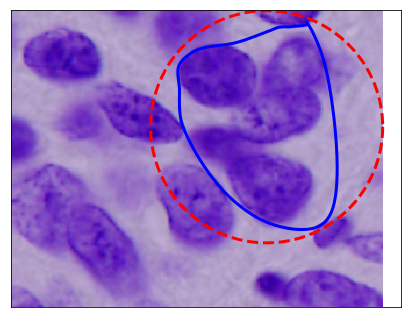

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [13]:
from skimage import img_as_float

In [14]:
im2 =img_as_float(im)

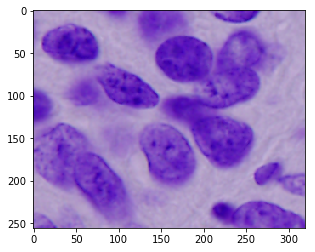

In [16]:
plt.imshow(im2)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = img_as_float(im)

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 35, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = img_as_float(data.coins())
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 230, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

ImportError: cannot import name morphological_geodesic_active_contour

In [19]:
from skimage.segmentation import *


In [20]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_15',
 '_16',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__name__',
 '__package__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'active_contour',
 'ax',
 'clear_border',
 'data',
 'df_labels',
 'df_nuclei_sizes',
 'exit',
 'felzenszwalb',
 'fig',
 'find_boundaries',
 'gaussian',
 'get_ipython',
 'get_nuclei_sizes',
 'im',
 'im2',
 'im_gray',
 'im_path',
 'image_ids',
 'imageio',
 'img_as_float',
 'init',
 'join_segmentations',
 'mark_boundaries',
 'np',
 'os',
 'pathlib',
 'pd',
 'plt',
 'quickshift',
 'quit',
 'random_walker',
 'relabel_from_one',
 'relabel_sequential',
 'rgb2gray',
 's',
 'skimage',
 'slic',
 'snake',
 'training_paths',
 'training_sorted',
 'watershed',
 'x',
 'y']